In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Kaggle_ Exercises

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Kaggle_ Exercises


In [221]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle_ Exercises/train.csv')


In [396]:
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Kaggle_ Exercises/test.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [73]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

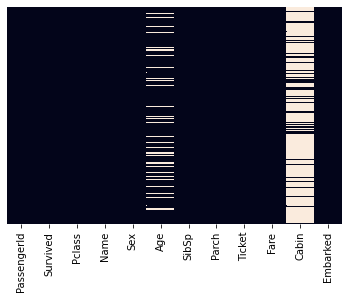

In [74]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

We will drop the cabin data because there ara a lot of NA values

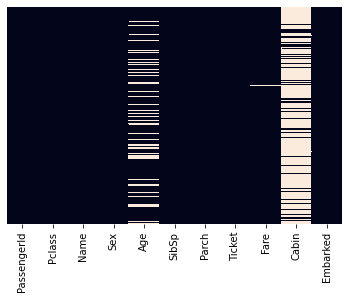

In [206]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [207]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [268]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [269]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [398]:
test = test.drop('Cabin',axis=1)

In [ ]:
train = train.drop('Cabin',axis=1)

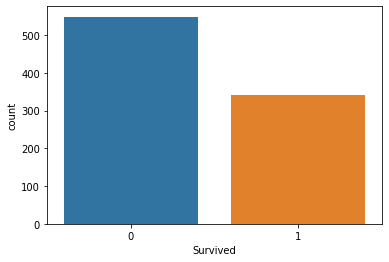

In [11]:
sns.countplot(x='Survived',data=train)

In [26]:
surv = train['Survived'].value_counts()[0]
not_surv = train['Survived'].value_counts()[1]
porc = (1-not_surv/surv)*100
print('They survived approx ',porc,'%')

They survived approx  37.704918032786885 %


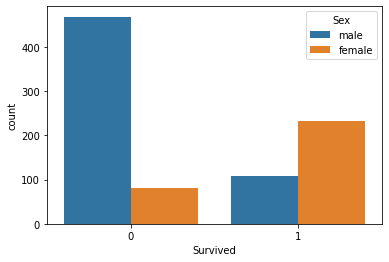

In [28]:
sns.countplot(x='Survived',hue='Sex',data=train)

More females survived

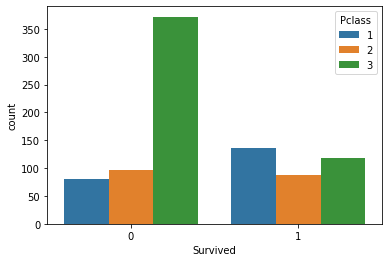

In [29]:
sns.countplot(x='Survived',hue='Pclass',data=train)

The Pclass = 3 didn´t survived

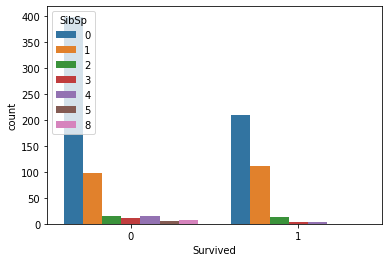

In [34]:
sns.countplot(x='Survived',hue='SibSp',data=train)

If they didn´t have siblings they were more probable to not survive

All the families with more than 5 children didn´t survive


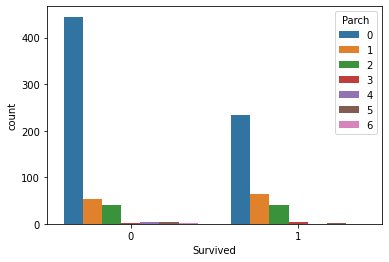

In [45]:
sns.countplot(x='Survived',hue='Parch',data=train)

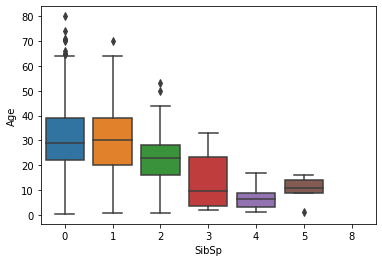

In [47]:
sns.boxplot(x='SibSp',y='Age',data=train)

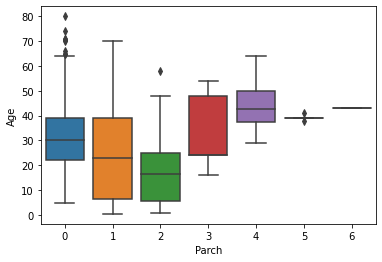

In [48]:
sns.boxplot(x='Parch',y='Age',data=train)

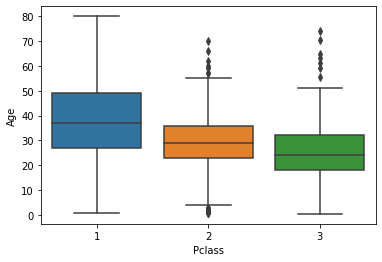

In [49]:
sns.boxplot(x='Pclass',y='Age',data=train)

The most logical one is to input the missing data with the Pclass variable

In [86]:
one = train[train['Pclass']==1]['Age'].mean().astype(int)
two = train[train['Pclass']==2]['Age'].mean().astype(int)
three = train[train['Pclass']==3]['Age'].mean().astype(int)
print('The means of ages depending of the Pclass are :',one,'for the class 1',two,'for the class 2 and',three,'for the class 3')

The means of ages depending of the Pclass are : 38 for the class 1 29 for the class 2 and 25 for the class 3


In [223]:
def age(vec):
    Age = vec[0]
    Pclass = vec[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 29

        else:
            return 25

    else:
        return Age

In [224]:
train['Age'] = train[['Age','Pclass']].apply(age,axis=1)

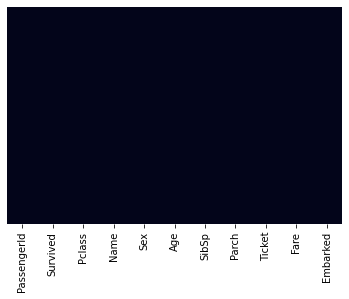

In [225]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [226]:
train.dropna(inplace=True)

In [227]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [228]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [212]:
ones = test[test['Pclass']==1]['Age'].mean().astype(int)
twos = test[test['Pclass']==2]['Age'].mean().astype(int)
threes = test[test['Pclass']==3]['Age'].mean().astype(int)
print('The means of ages depending of the Pclass are :',ones,'for the class 1',twos,'for the class 2 and',threes,'for the class 3')

The means of ages depending of the Pclass are : 40 for the class 1 28 for the class 2 and 24 for the class 3


In [213]:
def ages(vec):
    Age = vec[0]
    Pclass = vec[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 40

        elif Pclass == 2:
            return 28

        else:
            return 24

    else:
        return Age

In [399]:
test['Age'] = test[['Age','Pclass']].apply(ages,axis=1)


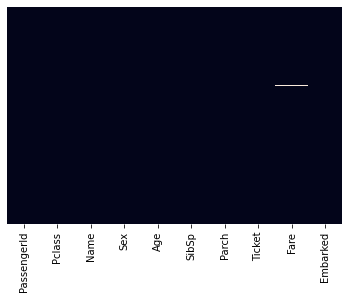

In [357]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [400]:
test.dropna(inplace=True)

In [358]:
test['Fare'].fillna(32.2, inplace = True)

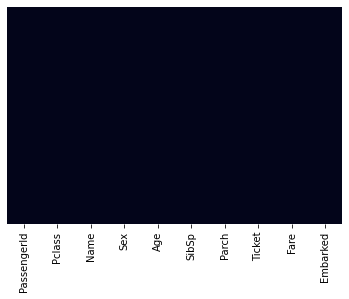

In [359]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [401]:
sexs = pd.get_dummies(test['Sex'],drop_first=True)
embarks = pd.get_dummies(test['Embarked'],drop_first=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [402]:
test = pd.concat([test,sexs,embarks],axis=1)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [384]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [403]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']
X_test = test

In [404]:
X_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,8.0500,1,0,1
414,1306,1,39.0,0,0,108.9000,0,0,0
415,1307,3,38.5,0,0,7.2500,1,0,1
416,1308,3,24.0,0,0,8.0500,1,0,1


In [363]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [364]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [365]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [366]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=27)

In [367]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [405]:
predictions_log = logmodel.predict(X_test)

In [406]:
predictions_tree = dtree.predict(X_test)

In [407]:
predictions_rfc = rfc.predict(X_test)

In [408]:
predictions_KNN = knn.predict(X_test)

In [409]:
predictions_SVC = svc.predict(X_test)

In [410]:
df = pd.DataFrame([predictions_log,predictions_tree,predictions_rfc,predictions_KNN,predictions_SVC]).transpose()
df.columns=['Log','Tree','RFC','KNN','SVC']
df.index=test['PassengerId']
df


,Log,Tree,RFC,KNN,SVC
PassengerId,,,,,
892,0,0,0,0,0
893,1,0,0,0,0
894,0,0,0,0,0
895,0,1,0,0,0
896,1,1,0,0,0
...,...,...,...,...,...
1305,0,0,0,0,0
1306,1,1,1,0,0
1307,0,0,0,0,0


In [411]:
data_frame = pd.DataFrame(predictions_rfc)
data_frame.columns=['Survived']
data_frame.index=test['PassengerId']
data_frame

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [412]:
data_frame.to_csv(r'/content/drive/My Drive/Colab Notebooks/Kaggle_ Exercises/submission.csv')